In [477]:
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [478]:
# Read the train and test csv files into pandas Dataframes
df = pd.read_csv('water_potability.csv', delimiter=',')

In [340]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### Data cleaning and preparation

In [479]:
# Make the column names lowercase
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [342]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   hardness         3276 non-null   float64
 2   solids           3276 non-null   float64
 3   chloramines      3276 non-null   float64
 4   sulfate          2495 non-null   float64
 5   conductivity     3276 non-null   float64
 6   organic_carbon   3276 non-null   float64
 7   trihalomethanes  3114 non-null   float64
 8   turbidity        3276 non-null   float64
 9   potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [481]:
# Missing values
df.isnull().sum()

ph                 0
hardness           0
solids             0
chloramines        0
sulfate            0
conductivity       0
organic_carbon     0
trihalomethanes    0
turbidity          0
potability         0
dtype: int64

In [ ]:
# Fill missing values
df['ph'] = df['ph'].fillna(
    df.groupby('potability')['ph'].transform('mean')
)

df['sulfate'] = df['sulfate'].fillna(
    df.groupby('potability')['sulfate'].transform('mean')
)

df['trihalomethanes'] = df['trihalomethanes'].fillna(
    df.groupby('potability')['trihalomethanes'].transform('mean')
)


In [ ]:
# Missing values after filling with the mean
df.isnull().sum()

### Exploratory Data Analysis (EDA)

In [482]:
df.describe()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080855,196.369496,22014.092526,7.122277,333.785123,426.205111,14.284970,66.395671,3.966786,0.390110
std,1.469958,32.879761,8768.570828,1.583085,36.145701,80.824064,3.308162,15.769901,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.085378,196.967627,20927.833607,7.130299,334.564290,421.884968,14.218338,66.303555,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [483]:
df.corr()

,ph,hardness,solids,chloramines,sulfate,conductivity,organic_carbon,trihalomethanes,turbidity,potability
ph,1.000000,0.075878,-0.081887,-0.031827,0.014785,0.017205,0.040092,0.003009,-0.036211,-0.003848
hardness,0.075878,1.000000,-0.046899,-0.030054,-0.092718,-0.023915,0.003610,-0.012718,-0.014449,-0.013837
solids,-0.081887,-0.046899,1.000000,-0.070148,-0.149809,0.013831,0.010242,-0.008849,0.019546,0.033743
chloramines,-0.031827,-0.030054,-0.070148,1.000000,0.023490,-0.020486,-0.012653,0.016615,0.002363,0.023779
sulfate,0.014785,-0.092718,-0.149809,0.023490,1.000000,-0.014196,0.027403,-0.025797,-0.009523,-0.026957
conductivity,0.017205,-0.023915,0.013831,-0.020486,-0.014196,1.000000,0.020966,0.001238,0.005798,-0.008128
organic_carbon,0.040092,0.003610,0.010242,-0.012653,0.027403,0.020966,1.000000,-0.012944,-0.027308,-0.030001
trihalomethanes,0.003009,-0.012718,-0.008849,0.016615,-0.025797,0.001238,-0.012944,1.000000,-0.021540,0.007305
turbidity,-0.036211,-0.014449,0.019546,0.002363,-0.009523,0.005798,-0.027308,-0.021540,1.000000,0.001581
potability,-0.003848,-0.013837,0.033743,0.023779,-0.026957,-0.008128,-0.030001,0.007305,0.001581,1.000000


<Axes: >

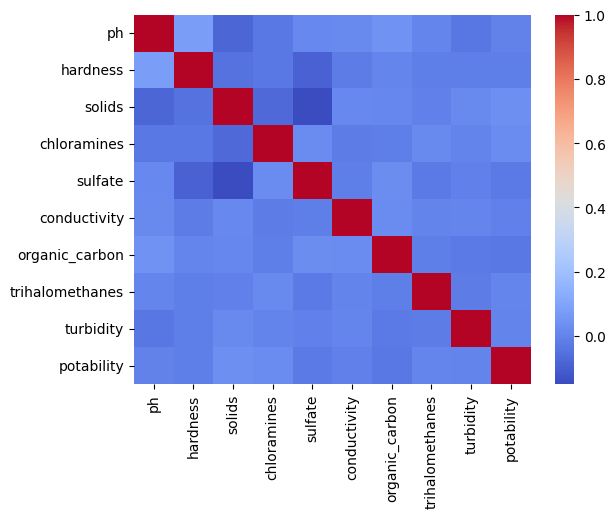

In [484]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [485]:
from sklearn.model_selection import train_test_split

In [486]:
# Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=9)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=9)

In [487]:
# Reset the Dataframe indexes
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [488]:
X_train = df_train.drop('potability',axis=1)
X_val = df_val.drop('potability',axis=1)
X_test = df_test.drop('potability',axis=1)

In [489]:
# Setup the target arrays 
y_train = df_train.potability.values
y_val = df_val.potability.values
y_test = df_test.potability.values

In [490]:
# Check the shape of result dataframes
(X_train.shape, y_train.shape), (X_val.shape, y_val.shape), (X_test.shape, y_test.shape)

(((1965, 9), (1965,)), ((655, 9), (655,)), ((656, 9), (656,)))

### Decision trees

In [358]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text

In [359]:
scores = []

for depth in [2, 3, 4, 5]:
    for s in [1, 5, 10, 15, 20, 500, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)

        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        
        scores.append((depth, s, auc))

In [360]:
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

In [361]:
df_scores

,max_depth,min_samples_leaf,auc
0,2,1,0.703386
1,2,5,0.703386
2,2,10,0.703386
3,2,15,0.703386
4,2,20,0.703386
5,2,500,0.709315
6,2,100,0.703386
7,2,200,0.693678
8,3,1,0.803502
9,3,5,0.803003


In [362]:
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)

auc                     
max_depth             2      3      4      5
min_samples_leaf                            
1                 0.703  0.804  0.829  0.829
5                 0.703  0.803  0.828  0.834
10                0.703  0.803  0.827  0.839
15                0.703  0.803  0.830  0.843
20                0.703  0.803  0.830  0.843
100               0.703  0.800  0.810  0.830
200               0.694  0.790  0.795  0.795
500               0.709  0.709  0.709  0.709

<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

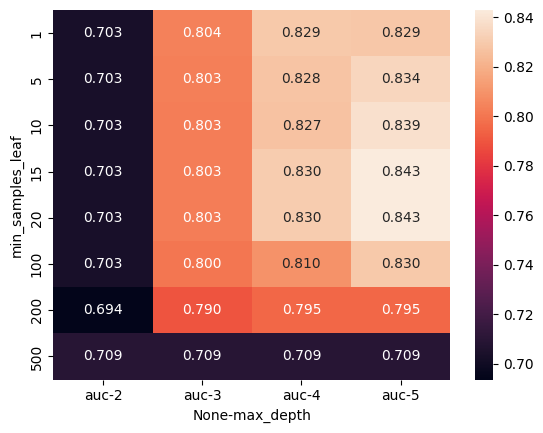

In [363]:
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [364]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [468]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

val_auc: 0.8430185949201259


In [366]:
print(export_text(dt, feature_names=list(X_train.columns)))

|--- sulfate <= 332.86
|   |--- sulfate <= 332.51
|   |   |--- ph <= 6.16
|   |   |   |--- chloramines <= 5.50
|   |   |   |   |--- class: 1
|   |   |   |--- chloramines >  5.50
|   |   |   |   |--- solids <= 17031.19
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- solids >  17031.19
|   |   |   |   |   |--- class: 0
|   |   |--- ph >  6.16
|   |   |   |--- solids <= 15172.44
|   |   |   |   |--- chloramines <= 8.69
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- chloramines >  8.69
|   |   |   |   |   |--- class: 0
|   |   |   |--- solids >  15172.44
|   |   |   |   |--- sulfate <= 295.03
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- sulfate >  295.03
|   |   |   |   |   |--- class: 0
|   |--- sulfate >  332.51
|   |   |--- trihalomethanes <= 73.15
|   |   |   |--- class: 1
|   |   |--- trihalomethanes >  73.15
|   |   |   |--- conductivity <= 451.06
|   |   |   |   |--- class: 1
|   |   |   |--- conductivity >  451.06
|   |   |   |   |--- class: 1
|--- sulfate 

### Ensembles and random forest

In [367]:
from sklearn.ensemble import RandomForestClassifier

In [371]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=9)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [372]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

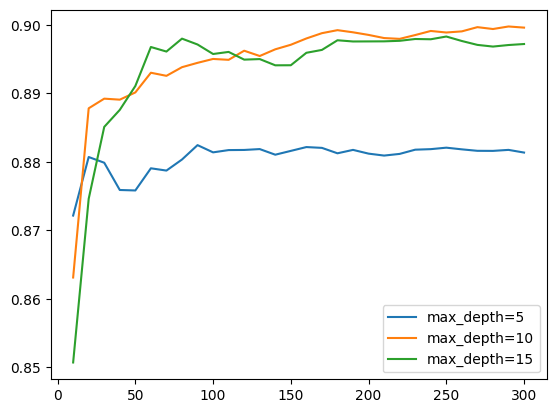

In [373]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [ ]:
# Best 'max_depth'
max_depth = 10

In [375]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 301, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=9)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [376]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

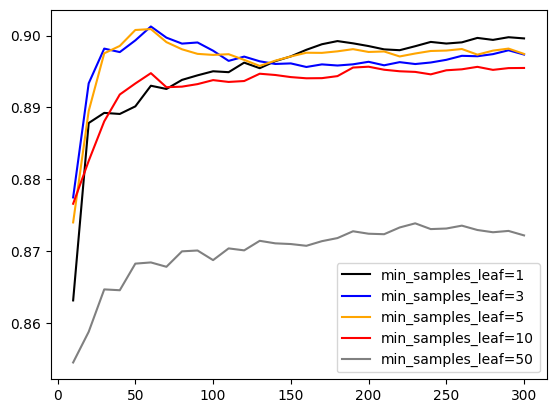

In [377]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [ ]:
# Best 'min_samples_leaf' and 'n_estimators'
min_samples_leaf = 1
n_estimators = 230

In [379]:
rf = RandomForestClassifier(n_estimators=n_estimators,
                            max_depth=max_depth,
                            min_samples_leaf=min_samples_leaf,
                            random_state=9)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=230, random_state=9)

In [ ]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

val: 0.8985100600277651


### XGBoost

In [381]:
import xgboost as xgb

In [392]:
features = list(X_train.columns)
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [393]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [394]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [395]:
scores = {}

#### Tuning 'max_depth'

In [424]:
%%capture output

xgb_params = {
'eta': 0.3, 
'max_depth': 3,
'min_child_weight': 1,

'objective': 'binary:logistic',
'eval_metric': 'auc',

'nthread': 8,
'seed': 9,
'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                verbose_eval=5,
                evals=watchlist)

In [425]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=3'

In [431]:
%%capture output

xgb_params = {
'eta': 0.3, 
'max_depth': 4,
'min_child_weight': 1,

'objective': 'binary:logistic',
'eval_metric': 'auc',

'nthread': 8,
'seed': 9,
'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                verbose_eval=5,
                evals=watchlist)


In [432]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=4'

In [433]:
%%capture output

xgb_params = {
'eta': 0.3, 
'max_depth': 6,
'min_child_weight': 1,

'objective': 'binary:logistic',
'eval_metric': 'auc',

'nthread': 8,
'seed': 9,
'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                verbose_eval=5,
                evals=watchlist)

In [434]:
key = 'max_depth=%s' % (xgb_params['max_depth'])
scores[key] = parse_xgb_output(output)
key

'max_depth=6'

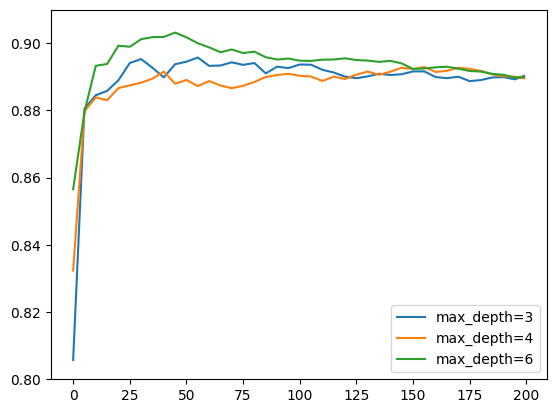

In [438]:
for max_depth, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=max_depth)

plt.ylim(0.8, 0.91)
plt.legend()

In [439]:
# Best 'max_depth'
max_depth = 6

#### Tuning 'eta'

In [444]:
scores = {}

In [446]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [447]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

In [448]:
%%capture output

xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [449]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.1'

In [450]:
%%capture output

xgb_params = {
    'eta': 0.01, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [451]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.01'

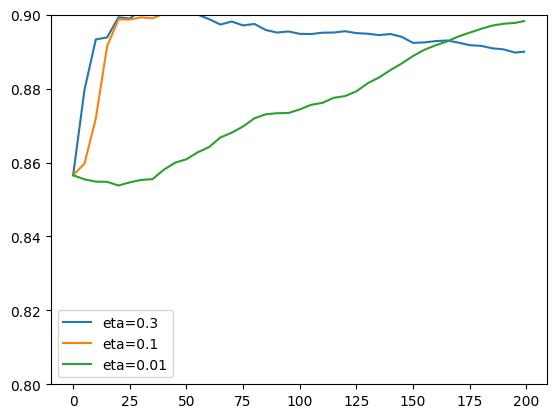

In [454]:
for eta, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=eta)

plt.ylim(0.8, 0.90)
plt.legend()

In [ ]:
# Best 'eta'
eta = 0.3

#### Tuning 'min_child_weight'

In [455]:
scores = {}

In [456]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [457]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=1'

In [458]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 10,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [459]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=10'

In [460]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 30,
    
    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200,
                  verbose_eval=5,
                  evals=watchlist)

In [461]:
key = 'min_child_weight=%s' % (xgb_params['min_child_weight'])
scores[key] = parse_xgb_output(output)
key

'min_child_weight=30'

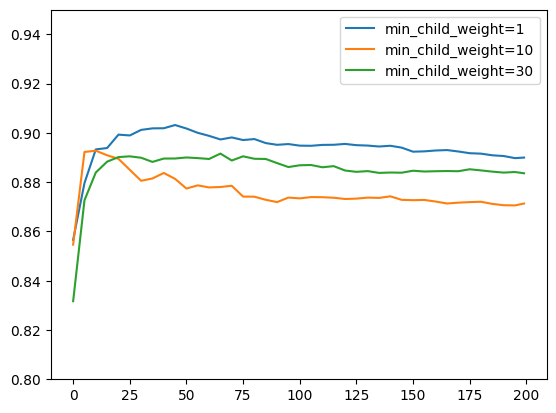

In [465]:
for min_child_weight, df_score in scores.items():
    plt.plot(df_score.num_iter, df_score.val_auc, label=min_child_weight)

plt.ylim(0.8, 0.95)
plt.legend()

In [ ]:
# Best 'min_child_weight'
min_child_weight = 1

### Selecting the final model

In [466]:
dt = DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=20)

In [467]:
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

val_auc: 0.8430185949201259


In [469]:
rf = RandomForestClassifier(n_estimators=230,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=9)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=230, random_state=9)

In [470]:
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

val_auc: 0.8985100600277651


In [471]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [472]:
y_pred = model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
print('val_auc:', auc)

val_auc: 0.8899751676671295


#### Winner: RandomForestClassifier

In [491]:
df_train_full = df_train_full.reset_index(drop=True)
X_train_full = df_train_full.drop('potability',axis=1)
y_train_full = df_train_full.potability.values

df_test = df_test.reset_index(drop=True)
X_test = df_test.drop('potability',axis=1)
y_test = df_test.potability.values

In [501]:
model = RandomForestClassifier(n_estimators=230,
                            max_depth=10,
                            min_samples_leaf=1,
                            random_state=9)
model.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=10, n_estimators=230, random_state=9)

In [502]:
y_pred = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred)
print('test_auc:', auc)

test_auc: 0.8602441406250001


#### If We choose XGBoost

In [503]:
df_train_full = df_train_full.reset_index(drop=True)
X_train_full = df_train_full.drop('potability',axis=1)
y_train_full = df_train_full.potability.values

In [504]:
features = list(X_train_full.columns)
dfulltrain = xgb.DMatrix(X_train_full, label=y_train_full,
                    feature_names=features)

dtest = xgb.DMatrix(X_test, feature_names=features)

In [496]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 9,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dfulltrain, num_boost_round=200)

In [497]:
y_pred = model.predict(dtest)
auc = roc_auc_score(y_test, y_pred)
print('test_auc:', auc)

test_auc: 0.854755859375


#### Making some predictions

In [507]:
xi = X_train_full.iloc[230]
print(xi)

ph                     5.821262
hardness             204.048890
solids             37174.005414
chloramines            7.867815
sulfate              329.019554
conductivity         466.783264
organic_carbon        13.988707
trihalomethanes       96.826961
turbidity              4.371079
Name: 230, dtype: float64


In [508]:
# RandomForest
prediction = model.predict_proba([xi])[:, 1]

# XGBoost
#dxi = xgb.DMatrix([xi], feature_names=features)
#prediction = model.predict(dxi)

print(prediction)

[0.20214879]


/home/jdanussi/.local/share/virtualenvs/ml-zoomcamp-2024-midterm-project-I58bSWJb/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Probar con 259 (potability=1) y 320 (potability=0)
y_train_full[259]

np.int64(1)